In [1]:
# -*- coding: utf-8 -*-
"""A demo for comparing PCA, ICA, CCA and HGR.
"""

__author__ = "ZifengWang"
__mail__ = "wangzf18@mails.tsinghua.edu.cn"
import numpy as np
import sklearn
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from sklearn.decomposition import PCA, KernelPCA
from sklearn.decomposition import FastICA
from sklearn.cross_decomposition import CCA

from utils import plot_demo, HGR

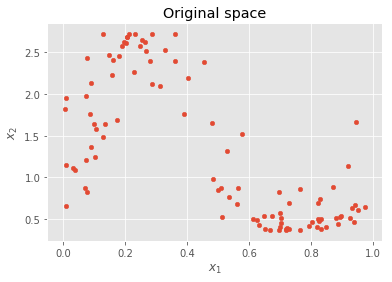

In [2]:
# synthetic data
x1 = np.random.rand(100)
eps = np.random.randn(x1.shape[0])
x2 = np.exp(np.sin(2*np.pi*x1 + 0.5*eps))
x1 = x1.reshape(-1,1)
x2 = x2.reshape(-1,1)
X = np.concatenate([x1,x2], axis=1)
# original space
plt.figure()
plt.title("Original space")
plt.scatter(x1, x2, s=20)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

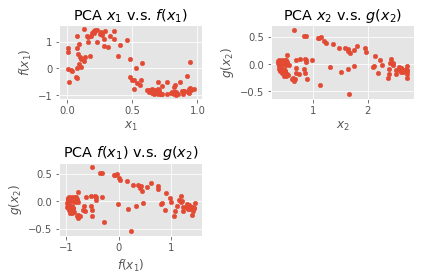

In [3]:
"PCA"
pca = PCA()
X_pca = pca.fit_transform(X)
fx1 = X_pca[:,0]
gx2 = X_pca[:,1]
plot_demo(x1,x2,fx1,gx2,"PCA")

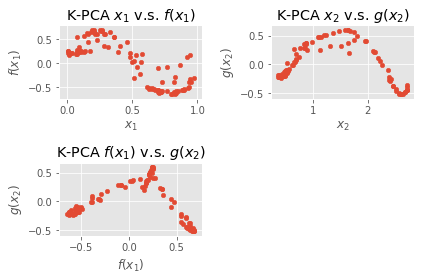

In [4]:
"Kernel PCA"
kpca = KernelPCA(kernel="rbf", gamma=10)
X_kpca = kpca.fit_transform(X)
fx1 = X_kpca[:,0]
gx2 = X_kpca[:,1]
plot_demo(x1,x2,fx1,gx2,"K-PCA")

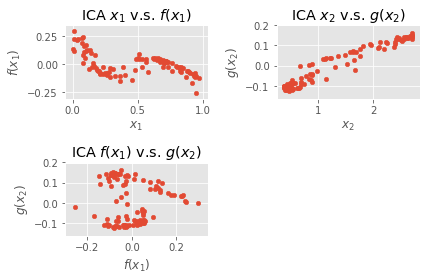

In [5]:
"ICA"
ica = FastICA()
X_ica = ica.fit_transform(X)
fx1 = X_ica[:,0]
gx2 = X_ica[:,1]
plot_demo(x1,x2,fx1,gx2,"ICA")

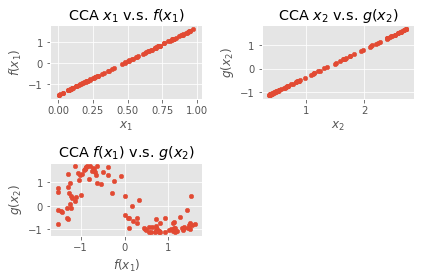

In [6]:
"CCA"
cca = CCA(n_components=1)
cca.fit(x1, x2)
X_cca = cca.transform(x1, x2)
fx1 = X_cca[0]
gx2 = X_cca[1]
plot_demo(x1,x2,fx1,gx2,"CCA")

[5000] neg_hscore: -0.36718058586120605
[10000] neg_hscore: -0.3746918737888336
[15000] neg_hscore: -0.3768359422683716


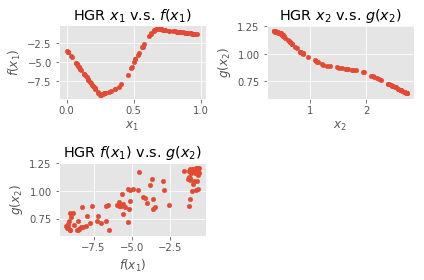

In [7]:
"HGR"
hgr = HGR(1,1)
hgr.fit(x1,x2,20000)
X_hgr = hgr.transform(x1,x2)
fx1 = X_hgr[0]
gx2 = X_hgr[1]
plot_demo(x1,x2,fx1,gx2,"HGR")